In [141]:
from cmath import sqrt
from random import *
import matplotlib.pyplot as plt
import numpy as np
import math
import random

features=[3,19,10,15,14,12,9,8,11,12,11,12,13,11,14,16]

In [142]:
def ObservationsByModality(features):
   
    # initializing the dictionary
    effectif = {}

    for item in features:
         # checking the element in dictionary
            if item in effectif:
                effectif[item] += 1
            else:
                effectif[item] = 1

  #return a dictionary with double input (key : value)
    return effectif
pass

staffing_dictionary = ObservationsByModality(features)

print("\n----------[Nous aurons un dictionnaire dont à chaqu'une  des observations est associé l'effectif correspondant]----------")

staffing_dictionary


----------[Nous aurons un dictionnaire dont à chaqu'une  des observations est associé l'effectif correspondant]----------


{3: 1, 19: 1, 10: 1, 15: 1, 14: 2, 12: 3, 9: 1, 8: 1, 11: 3, 13: 1, 16: 1}

In [143]:
#===============================[Frequency by modality]============================================
  
"""
la fréquence c'est le rapport entre l'effectif d'une variable sur l'effectif total. 
#=> fi = ni/N 
"""

def frequencyByModality(features):
    
    staffing_Table=ObservationsByModality(features)

    #dictionnary
    frequency_table={}
   
   #sum of staff
    somme_ni=0

    # we will remove the duplicates in order to make the sum
    features=list(set(features))

    for valueObservation in features:
            
         somme_ni = somme_ni+staffing_Table[valueObservation]

    for item in features:
        v=staffing_Table[item]
        freq = v/somme_ni
        frequency_table[item]=freq

    return frequency_table
pass

#call function
freq=frequencyByModality(features)

print("\n----------[Dans notre dictionnaire a chacune des observations est associé la frequence correspondante]----------")

freq


----------[Dans notre dictionnaire a chacune des observations est associé la frequence correspondante]----------


{3: 0.0625,
 8: 0.0625,
 9: 0.0625,
 10: 0.0625,
 11: 0.1875,
 12: 0.1875,
 13: 0.0625,
 14: 0.125,
 15: 0.0625,
 16: 0.0625,
 19: 0.0625}

In [144]:
def CumulativeFrequencyByModality(features):
    
   frequency_dictionnary=frequencyByModality(features)

   cumul_dictionary={}

   somme_f=0
  
   features.sort()

   features=list(set(features))


   for valeursObservation in features:

    somme_f=0

    for key, value in frequency_dictionnary.items() :
        if((valeursObservation > 0) & (key==features[0]==valeursObservation)):
          
                cumul_dictionary[valeursObservation]=value

                
        elif((valeursObservation>0) & (key <= valeursObservation)) :

            somme_f+=value
            cumul_dictionary[valeursObservation] = somme_f
            
   return (cumul_dictionary)
pass

#call function
cumul=CumulativeFrequencyByModality(features)

print("\n----------[la frequence au niveau de chaque modalité correspond à la somme des frequences des modalité qui lui sont inferieur]----------")

cumul


----------[la frequence au niveau de chaque modalité correspond à la somme des frequences des modalité qui lui sont inferieur]----------


{3: 0.0625,
 8: 0.125,
 9: 0.1875,
 10: 0.25,
 11: 0.4375,
 12: 0.625,
 13: 0.6875,
 14: 0.8125,
 15: 0.875,
 16: 0.9375,
 19: 1.0}

In [145]:
#===============================[Médiane]==============================

def median(features) :

    # sorted array
    features.sort()

    #length of the array
    length = len(features)

    n=length//2

    mediane=0

    if(length % 2 == 0) :                            
        rang = (n)+1
        rangPython= rang-1
        mediane=math.ceil(features[int(rangPython)])


    else:
        rang = (length+1)/2    

        rangPython=rang-1

        mediane= features[int(rangPython)]
 

    return mediane
pass

#call function 
med= median(features)

print("\n----------[Affichage]----------\n")

print("pour cet exemple de serie d'observation "+ str(features)+" la mediane est : "+ str(med))



----------[Affichage]----------

pour cet exemple de serie d'observation [3, 8, 9, 10, 11, 11, 11, 12, 12, 12, 13, 14, 14, 15, 16, 19] la mediane est : 12


In [146]:
#===============================[Moyenne]==============================

def calculMoyenne(features) :
    

    features_size=len(features)

    sum_xi=0

    if features_size > 0 :

        for valeurObservaion in features :

            sum_xi=sum_xi + valeurObservaion

        moyenne=sum_xi/features_size

        return moyenne
pass

In [147]:
#===============================[Moyenne]==============================

def calculMoyenne(features) :
    

    features_size=len(features)

    sum_xi=0

    if features_size > 0 :

        for valeurObservaion in features :

            sum_xi=sum_xi + valeurObservaion

        moyenne=sum_xi/features_size

        return moyenne
pass

#===============================[Variance]==============================

def variance(features):

    moyenne=calculMoyenne(features)

    sum_of_mean_square_deviation=0

    features_size=len(features)

    for valeursObservation in features:

        sum_of_mean_square_deviation = sum_of_mean_square_deviation + ((valeursObservation-moyenne)**2)

    variance=(sum_of_mean_square_deviation/features_size)

    return (variance)   
pass

#call function

_var_ = variance(features)

_var_

12.234375

In [148]:
#===============================[ Calcul Centered moment order r ]============================== 
def CenteredMoment(order,features):
    
    moyenne=calculMoyenne(features)

    sum_of_mean_square_deviation=0
    
    features_size=len(features)
    for valeursObservation in features:
        sum_of_mean_square_deviation = sum_of_mean_square_deviation + ((valeursObservation-moyenne)**order)

    centered_moment_order_r =(sum_of_mean_square_deviation/features_size)

    return centered_moment_order_r
pass

In [149]:
#===============================[Coefficient D'aplatissement de Pearson]================================ 

def kurtosis(features):

    moyenne=calculMoyenne(features)  

    sum_of_mean_square_deviation=0
    sum_of_mean_square_deviation_2=0
    features_size=len(features)

    # Centered Moment order 4
    for valeursObservation in features:
       
        sum_of_mean_square_deviation = sum_of_mean_square_deviation + ((valeursObservation-moyenne)**4)

    centered_moment_order_4=(sum_of_mean_square_deviation/features_size)

    # Centered Moment order 2
    for valeursObservation in features:
       
        sum_of_mean_square_deviation_2 = sum_of_mean_square_deviation_2 + ((valeursObservation-moyenne)**2)

    centered_moment_order_2=(sum_of_mean_square_deviation_2/features_size)

    beta=((centered_moment_order_4)/((centered_moment_order_2)**2))

    print(beta)

In [150]:
def standarDeviation(features)  :

    var=variance(features)
    std =sqrt(var)
    return std
pass

In [151]:
#===============================[Coefficient Asymetrique de fisher]============================== 

def Skewness(features):

    moyenne=calculMoyenne(features)

    std=standarDeviation(features)

    sum_of_mean_square_deviation=0

    features_size=len(features)

    for valeursObservation in features:
       
        sum_of_mean_square_deviation = sum_of_mean_square_deviation + ((valeursObservation-moyenne)**3)

    centered_moment_order = (sum_of_mean_square_deviation/features_size)

    gamma=((centered_moment_order)/(std**3))

    print(gamma)

In [152]:
#===============================[Median en utilisant la frequence cumulé]==============================

def medianAccordingCumulativeFrenquency(features):
    
    cumul_dictionary=CumulativeFrequencyByModality(features)

    features_size=len(features)
    Quotient=0

    if(features_size%2==0):

        rang=(features_size//2)+1

        rangPython=rang-1

        median=features[rangPython]

        Quotient=rangPython/features_size
        #print(Quotient)

        for key,valueObservation in cumul_dictionary.items() :
            if(valueObservation>=Quotient):
                print("première valeur superieur a "+str(Quotient)+" est : " +str(valueObservation))
                print("la mediane en function de la frequence cumulé : la projection de la valeur "+str(valueObservation)+ " donne une médiane égal à : "+str(key))
                return 

    else:
        rang=((features_size+1)//2)
        rangPython=rang-1
        mediane=features[rangPython]

        Quotient=rangPython/features_size
        print(Quotient)
        for key,valueObservation in cumul_dictionary.items() :
            if(valueObservation>=Quotient):
                print("première valeur superieur a "+str(Quotient)+" est : " +str(valueObservation))
                
                print("la mediane en function de la frequence cumulé : la projection de la valeur "+str(valueObservation)+ " donne une médiane égal à : "+str(key))
                return
pass

#call function 

print("\n--------------------[Résultat de l'exécution]--------------------\n")
medianAccordingCumulativeFrenquency(features)



--------------------[Résultat de l'exécution]--------------------

première valeur superieur a 0.5 est : 0.625
la mediane en function de la frequence cumulé : la projection de la valeur 0.625 donne une médiane égal à : 12


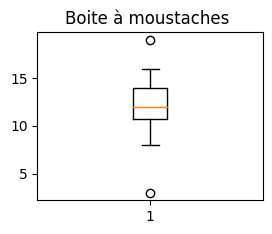

In [153]:
#===============================[boite à moustaches]============================== 

def boiteMoustaches(features):

    plt.subplot(2, 2 , 4)
    plt.boxplot(features)
    plt.title( "Boite à moustaches " )
    plt.show()
pass

#call function
boiteMoustaches(features)


In [154]:
#======================================[Etude d'une Variable Statistique]========================================================

#1-Covariance

def covariance(x, y):

    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)
    cov = numerator/denominator
    return cov
pass


In [155]:
#======================================[Etude d'une Variable Statistique]========================================================

#2-Corelation

def correlation(x, y):

    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]

    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])

    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])

    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 
    cor = numerator/denominator
    return cor
pass

In [156]:
def LinearRegression1(x,y):

    a=covariance(x,y)/variance(x)
    x=calculMoyenne(x)
    y=calculMoyenne(y)
    b= y-(a*x)
    return (a,b)
pass

Estimated coefficients:
b_0 = 2.25            
b_1 = -0.8333333333333335


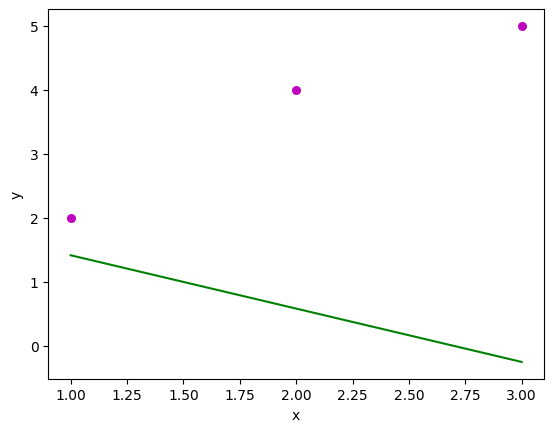

In [157]:
#==========================================[Linear Regression curve]=============================================================

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()


def main():
    # observations / data
    array1 = np.array([1,2,3])
    array2 = np.array([2,4,5])
  
    # estimating coefficients
    b = LinearRegression1(array1, array2)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(array1, array2, b)
  
if __name__ == "__main__":
    main()